In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,No Data Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data Avaiable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,No Data Available,No Data Available,No Data Avaiable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,No Data Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [ ]:
print("Missing values before cleaning: ")
print(df.isnull().sum())

Missing values before cleaning: 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df['director'] = df['director'].fillna('No Data Available')
df['cast'] = df['cast'].fillna('No Data Available')
df['country'] = df['country'].fillna('No Data Avaiable')

In [ ]:
df.dropna(subset=['date_added','rating'],inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
print("Data Successfully Cleaned")

Data Successfully Cleaned


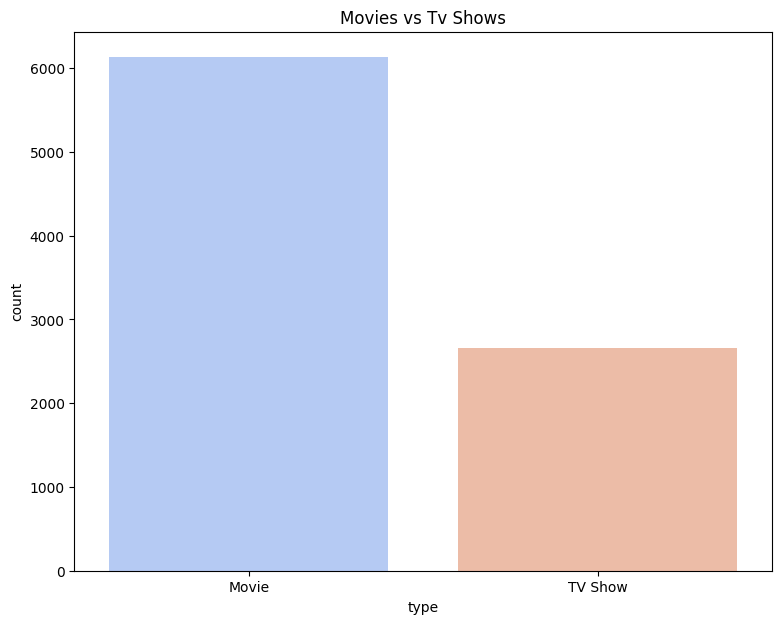

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(x='type', data=df, palette='coolwarm',hue='type')
plt.title('Movies vs Tv Shows')
plt.show()

In [ ]:
filtered_countries = df[df['country'] != 'Unkown']
top_countries = filtered_countries['country'].value_counts().head(10)

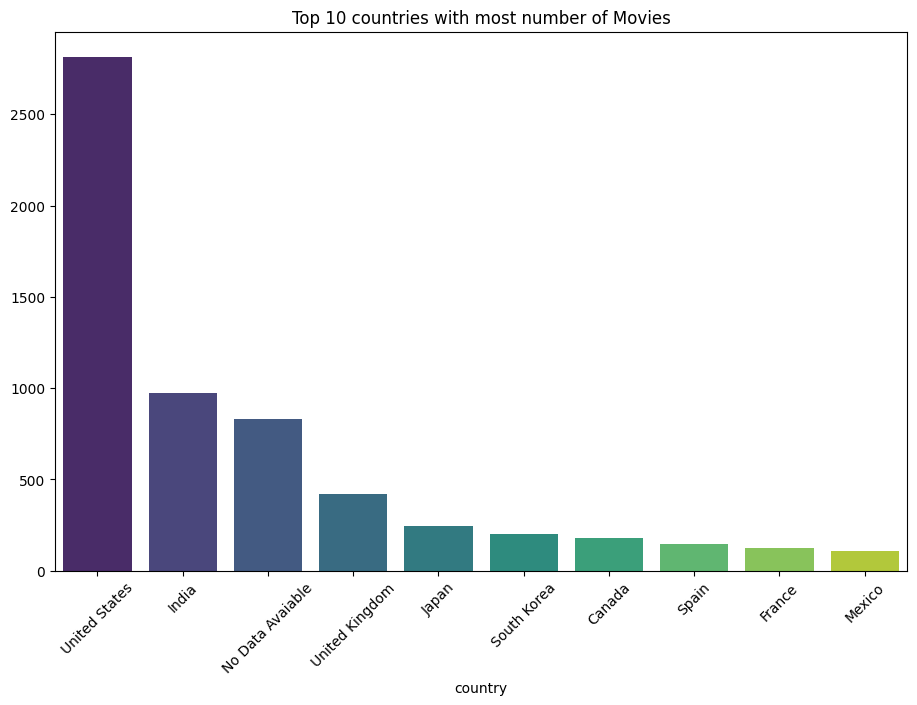

In [ ]:
plt.figure(figsize = (11,7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=top_countries.index)
plt.title('Top 10 countries with most number of Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['year_added'] = df['date_added'].dt.year
recent_data = df[df['year_added'] >= 2016]
trend_data = recent_data.groupby(['year_added', 'type']).size().unstack()

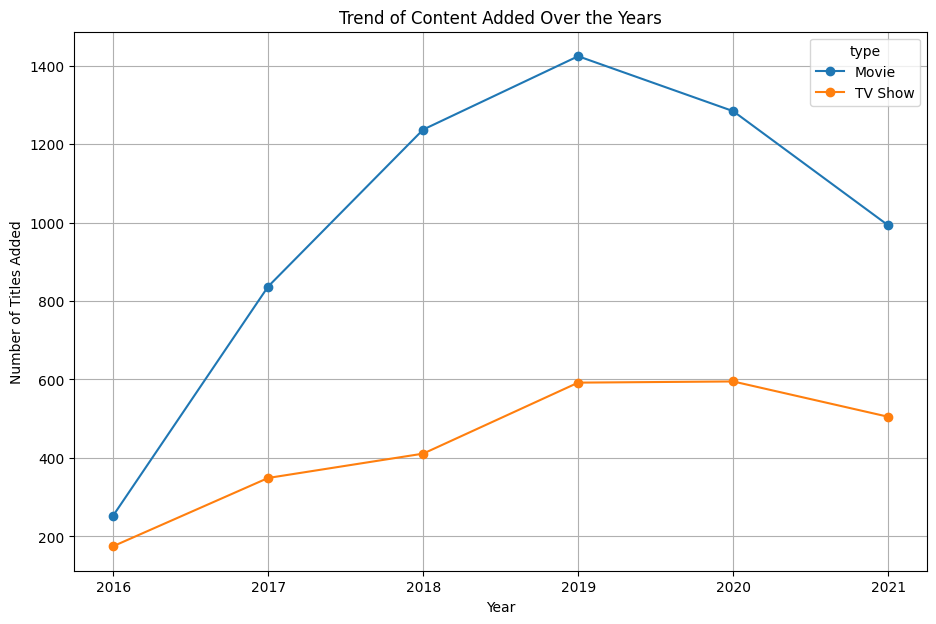

In [ ]:
trend_data.plot(kind='line', figsize=(11,7), marker='o')
plt.title('Trend of Content Added Over the Years')
plt.ylabel('Number of Titles Added')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [ ]:
print('Insight Check: ')
print(trend_data)

Insight Check: 
type        Movie  TV Show
year_added                
2016          253      175
2017          837      349
2018         1237      411
2019         1424      592
2020         1284      595
2021          993      505
